In [1]:
import pandas as pd
import simpsom as sps
spaceship=pd.read_csv('spaceship-titanic/train.csv')
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
spaceship.dropna(inplace=True)
spaceship.drop(['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Name','Age'],axis=1,inplace=True)
spaceship_data=spaceship.iloc[:,:-1]
spaceship_data

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [3]:
spaceship_target=spaceship.iloc[:,-1]
spaceship_target=pd.DataFrame(0 if i == False else 1 for i in spaceship_target.values)
spaceship_target

,0
0,0
1,1
2,0
3,0
4,1
...,...
6601,0
6602,0
6603,1
6604,0


Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


<Figure size 3000x1000 with 0 Axes>

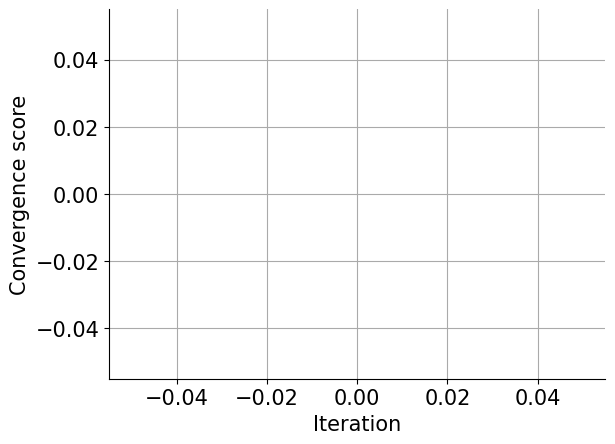

In [4]:
net=sps.SOMNet(10,10,spaceship_data,GPU=False)
net.train(epochs=100)
net.plot_convergence()

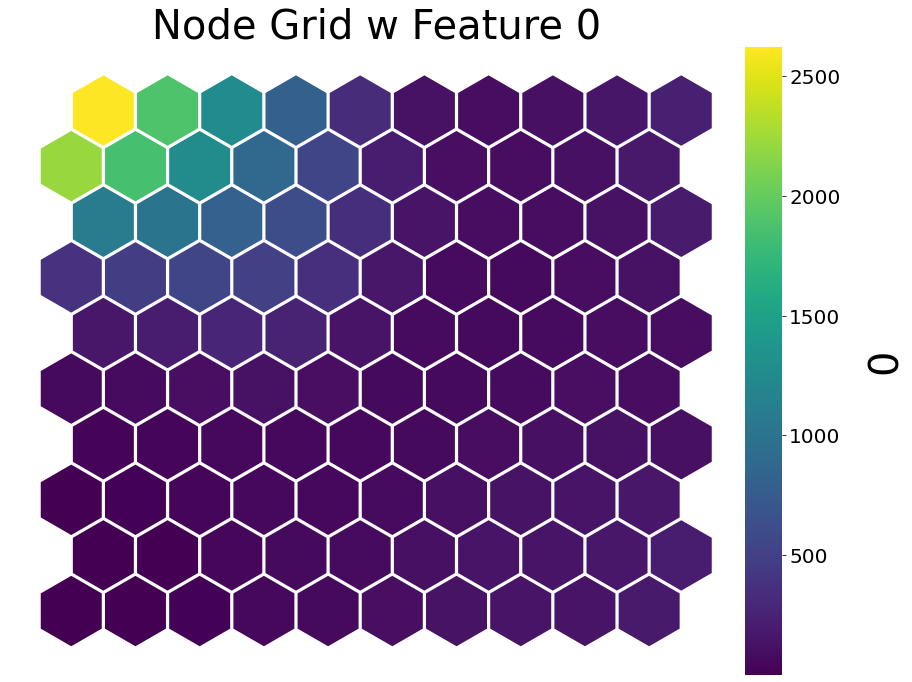

In [5]:
net.nodes_graph()

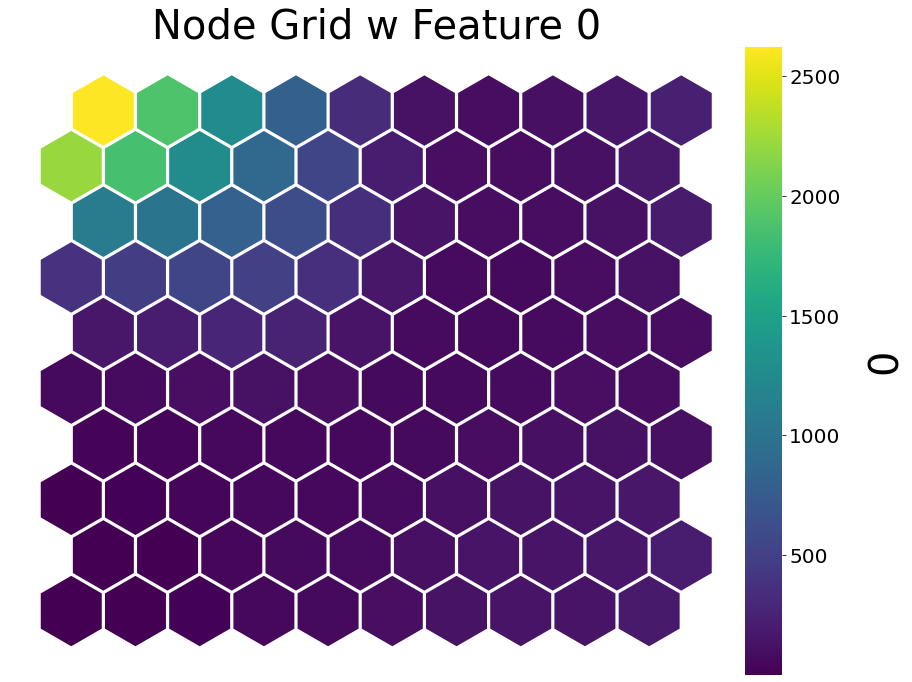

In [6]:
net.nodes_graph()

In [7]:
net.project(spaceship_data,labels=spaceship_target,show=True)

ValueError: Unable to coerce to Series, length must be 1: given 0